In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [36]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Data Exploration and Preprocessing**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [38]:
df.duplicated().sum()

0

In [39]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']


In [40]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [41]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

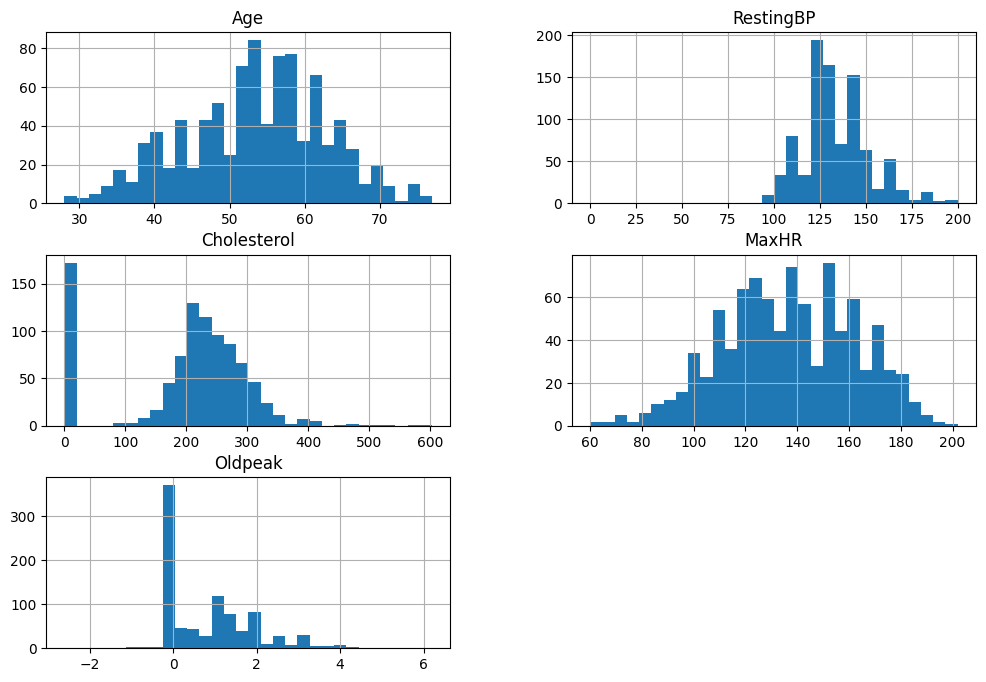

In [42]:
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].hist(bins=30, figsize=(12, 8))
plt.show()

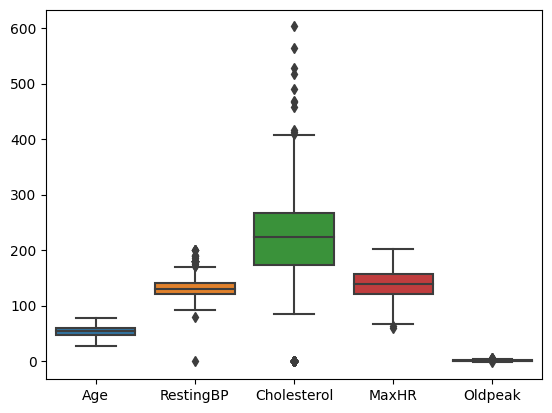

In [43]:
sns.boxplot(data=df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
plt.show()

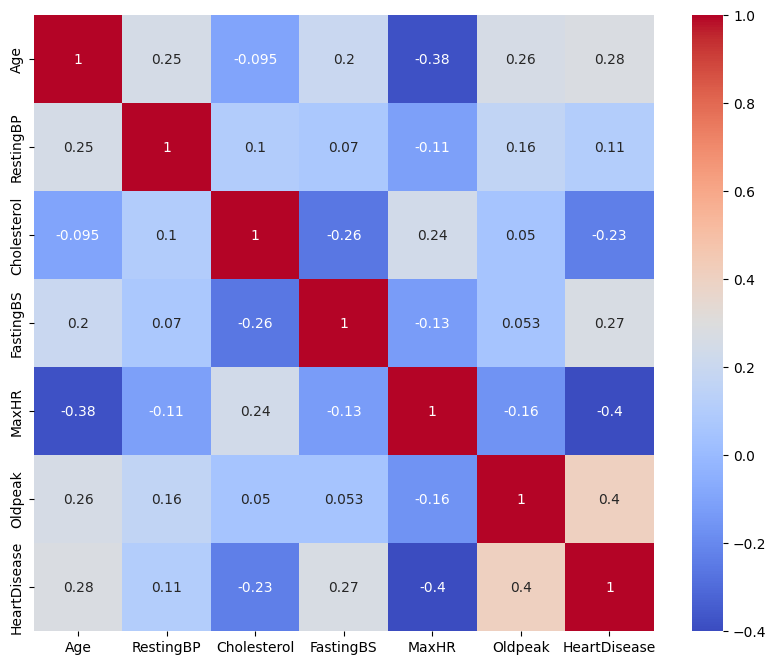

In [44]:
numeric_data = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

**Feature Engineering**

In [45]:
encoder = LabelEncoder()

X['Sex'] = encoder.fit_transform(X['Sex'])
X['ChestPainType'] = encoder.fit_transform(X['ChestPainType'])
X['RestingECG'] = encoder.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = encoder.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = encoder.fit_transform(X['ST_Slope'])

In [46]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [48]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,0,1,140,195,0,1,179,0,0.0,2
30,53,1,2,145,518,0,1,130,0,0.0,1
377,65,1,0,160,0,1,2,122,0,1.2,1
535,56,1,0,130,0,0,0,122,1,1.0,1
807,54,1,1,108,309,0,1,156,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
211,50,0,2,140,288,0,1,140,1,0.0,1
745,63,0,0,108,269,0,1,169,1,1.8,1
584,64,1,0,141,244,1,2,116,1,1.5,1
878,49,1,1,130,266,0,1,171,0,0.6,2


**Machine Learning Model Developmen**

In [49]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
lr.score(X_train, y_train)


0.8583106267029973

In [51]:
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.842391304347826


In [52]:
print(confusion_matrix(y_test, y_pred))

[[67 10]
 [19 88]]


In [53]:
tree = DecisionTreeClassifier(max_depth=4)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [54]:
tree.score(X_train, y_train)

0.8773841961852861

In [55]:
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8695652173913043


In [56]:
rf = RandomForestClassifier(n_estimators=10, max_depth=6)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=10)

In [57]:
rf.score(X_train, y_train)

0.9196185286103542

In [58]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.875


In [59]:
est = DecisionTreeClassifier(max_depth=6)

bagg = BaggingClassifier(estimator=est, n_estimators=10)

bagg.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6))

In [60]:
bagg.score(X_train, y_train)

0.9264305177111717

In [61]:
bagg.score(X_test, y_test)

0.8695652173913043

In [62]:
xgb = XGBClassifier(n_estimators=5)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
xgb.score(X_train, y_train)



0.9359673024523161

In [64]:
xgb.score(X_test, y_test)

0.8913043478260869

**Model Evaluation and Fine-tuning**

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc, prec, rec, f1))
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))


results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("\nModel Comparison:")
print(results_df.sort_values(by='F1 Score', ascending=False))

# Hyperparameter tuning 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)

#  Evaluation after tuning
print("\nBest Parameters Found:", grid_search.best_params_)
print("\nEvaluation After Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_tuned))

#  Compare before and after tuning
before_tuning = results_df[results_df['Model'] == 'Random Forest'].iloc[0]
after_tuning = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall': recall_score(y_test, y_pred_tuned),
    'F1 Score': f1_score(y_test, y_pred_tuned)
}

print("\nPerformance Improvement for Random Forest:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    print(f"{metric}: Before = {before_tuning[metric]:.4f}, After = {after_tuning[metric]:.4f}")



Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.91      0.90      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        77
           1       0.86      0.77      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


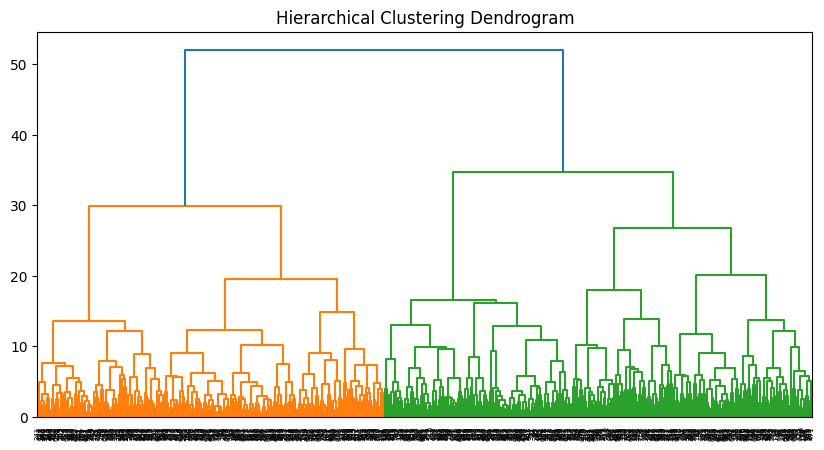

In [73]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
kmeans = KMeans(n_clusters=2) 
clusters = kmeans.fit_predict(X_train_scaled) 
#Hierarchical Dendrogram
linked = linkage(X_train_scaled, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram") 
plt.show()

In [74]:
import joblib

joblib.dump(best_model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']